##  KNN Project. CLassification

### Objective 
To classify data using KNN

#### Import neccessary libraries 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing


####  About Dataset
Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
1- Basic Service
2- E-Service
3- Plus Service
4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


In [5]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
region,1000.0,2.022,0.816200,1.0,1.0,2.0,3.0,3.0
tenure,1000.0,35.526,21.359812,1.0,17.0,34.0,54.0,72.0
age,1000.0,41.684,12.558816,18.0,32.0,40.0,51.0,77.0
marital,1000.0,0.495,0.500225,0.0,0.0,0.0,1.0,1.0
address,1000.0,11.551,10.086681,0.0,3.0,9.0,18.0,55.0
income,1000.0,77.535,107.044165,9.0,29.0,47.0,83.0,1668.0
ed,1000.0,2.671,1.222397,1.0,2.0,3.0,4.0,5.0
employ,1000.0,10.987,10.082087,0.0,3.0,8.0,17.0,47.0
retire,1000.0,0.047,0.211745,0.0,0.0,0.0,0.0,1.0
gender,1000.0,0.517,0.499961,0.0,0.0,1.0,1.0,1.0


##### Checking Missing values in the dataset

In [7]:
df.isna().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [8]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [9]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Visualizing distribution of data using plotly express

In [11]:
import plotly.express as px
data= df['income']
plot=px.histogram(df, x=data)
plot.show()

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array: 
Let us also define our x and y variables 

In [12]:
x = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [13]:
y=df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

### Data Normilization
Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:


In [14]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train test split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
`Train/Test Split` involves splitting the dataset into `training` and `testing` sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=4)
print(f'The shape of x_train is {x_train.shape}, and x_test is {x_test.shape}')
print(f'The shape of y_train is {y_train.shape}, and y_test is {y_test.shape}')

The shape of x_train is (800, 11), and x_test is (200, 11)
The shape of y_train is (800,), and y_test is (200,)


### Classification 
The next step after data preprocessing and spliting is training the model. 

### KNN Classifier
To train the model we must import neccessary library. An sklearn library called $KNeighborsClassifier$ is used for classification


In [16]:
from sklearn.neighbors import KNeighborsClassifier as kn

### Training

Let's start the algorithm with k=4 for now:


In [17]:
k=4
model=kn(n_neighbors=k).fit(x_train, y_train)
model

KNeighborsClassifier(n_neighbors=4)

### Predicting

We can use the model to make predictions on the test set:


In [18]:
y_hat=model.predict(x_test)
y_hat[0:5]

c:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



array([1, 1, 3, 2, 4], dtype=int64)

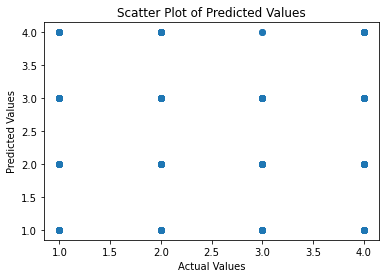

In [36]:
plt.scatter(y_test, y_hat)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted Values')

# Show the plot
plt.show()

In [23]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


c:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Lest try with K=6

In [24]:
k=6
model=kn(n_neighbors=k).fit(x_train, y_train)
model

KNeighborsClassifier(n_neighbors=6)

In [25]:
y_hat=model.predict(x_test)
y_hat[0:5]

c:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



array([3, 3, 3, 4, 4], dtype=int64)

In [27]:
print("Train accuracy:", metrics.accuracy_score(y_train,model.predict(x_train)))
print('Test set accuracy:', metrics.accuracy_score(y_test,y_hat))

Train accuracy: 0.51625
Test set accuracy: 0.31


c:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Lets try train the model with different  values of $k$

In [28]:
ks =20 
mean_acc=np.zeros((ks-1))
stard_acc=np.zeros((ks-1))

for n in range(1,ks):
    #let us train the model with different ks 
    model=kn(n_neighbors=n).fit(x_train,y_train)
    y_hat=model.predict(x_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,y_hat)

    stard_acc[n-1]=np.std(y_hat==y_test)/np.std(y_hat.shape[0])
mean_acc


c:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

<ipython-input-28-81f9767033f4>:11: RuntimeWarning:

divide by zero encountered in double_scalars

c:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the 

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315, 0.34 , 0.36 , 0.355, 0.35 ,
       0.345])

In [34]:
fig = px.line()

# Add the main line plot
fig.add_scatter(x=list(range(1, ks)), y=mean_acc, mode='lines', name='Accuracy')

# Add the filled areas
fig.add_scatter(
    x=list(range(1, ks)),
    y=mean_acc + 1 * stard_acc,
    fill='tonexty',
    fillcolor='rgba(0,100,0,0.1)',
    name='+/- 1xstd'
)

fig.add_scatter(
    x=list(range(1, ks)),
    y=mean_acc - 1 * stard_acc,
    fill='tonexty',
    fillcolor='rgba(0,100,0,0.1)',
    name='+/- 1xstd'
)

fig.add_scatter(
    x=list(range(1, ks)),
    y=mean_acc + 3 * stard_acc,
    fill='tonexty',
    fillcolor='rgba(0,100,0,0.1)',
    name='+/- 3xstd'
)

fig.add_scatter(
    x=list(range(1, ks)),
    y=mean_acc - 3 * stard_acc,
    fill='tonexty',
    fillcolor='rgba(0,100,0,0.1)',
    name='+/- 3xstd'
)

# Set the layout
fig.update_layout(
    title='Accuracy vs. Number of Neighbors',
    xaxis_title='Number of Neighbors (K)',
    yaxis_title='Accuracy',
    legend_title='',
    template='plotly_white'
)

# Show the plot
fig.show()

In [35]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.36 with k= 16
